## A notebook to create a bar graph of datasets per organ

This recreates [https://github.com/cns-iu/hra-cell-type-populations-supporting-information/blob/main/paper_plots/hra-pop-as-datasets-cells.Rmd](https://github.com/cns-iu/hra-cell-type-populations-supporting-information/blob/main/paper_plots/hra-pop-as-datasets-cells.Rmd) and potentially all other plots for the paper.

## Install and import libraries

In [190]:
%pip install pandas seaborn numpy requests

import pandas as pd
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import textwrap
from io import StringIO
from matplotlib.ticker import ScalarFormatter

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Set global variables

In [191]:
hra_pop_version = 'v1.0'
branch = 'main'

## Load data

In [192]:
# could also use https://apps.humanatlas.io/api/grlc/hra-pop.html#get-/cell-types-in-atlas
url = f"https://raw.githubusercontent.com/x-atlas-consortia/hra-pop/refs/heads/{branch}/output-data/{hra_pop_version}/reports/atlas-ad-hoc/cell-types-in-anatomical-structurescts-per-as.csv"

headers = {
    'Accept': 'text/csv'
}

data = requests.get(url=url, headers=headers).text

df = pd.read_csv(StringIO(data))
df

,organ,as,as_label,sex,tool,modality,cell_id,cell_label,cell_count,cell_percentage,dataset_count
0,large intestine,http://purl.obolibrary.org/obo/UBERON_0001052,rectum,Female,celltypist,sc_transcriptomics,https://purl.org/ccf/ASCTB-TEMP_colonocyte,Colonocyte,1.205,0.147653,3
1,large intestine,http://purl.obolibrary.org/obo/UBERON_0001052,rectum,Female,celltypist,sc_transcriptomics,https://purl.org/ccf/ASCTB-TEMP_iga-plasma-cell,IgA plasma cell,1.182,0.144835,3
2,large intestine,http://purl.obolibrary.org/obo/UBERON_0001052,rectum,Female,celltypist,sc_transcriptomics,https://purl.org/ccf/ASCTB-TEMP_best4-epithelial,BEST4+ epithelial,0.699,0.085651,3
3,large intestine,http://purl.obolibrary.org/obo/UBERON_0001052,rectum,Female,celltypist,sc_transcriptomics,https://purl.org/ccf/ASCTB-TEMP_activated-cd4-t,Activated CD4 T,0.690,0.084548,3
4,large intestine,http://purl.obolibrary.org/obo/UBERON_0001052,rectum,Female,celltypist,sc_transcriptomics,https://purl.org/ccf/ASCTB-TEMP_ta,TA,0.540,0.066168,3
...,...,...,...,...,...,...,...,...,...,...,...
8891,lung,http://purl.org/sig/ont/fma/fma7508,Left posterior basal segmental bronchus,Male,sc_proteomics,sc_proteomics,http://purl.obolibrary.org/obo/CL_0000097,Mast Cell,15322.464,0.024702,1
8892,lung,http://purl.org/sig/ont/fma/fma7508,Left posterior basal segmental bronchus,Male,sc_proteomics,sc_proteomics,http://purl.obolibrary.org/obo/CL_4033039,CD8+ T Cell,3691.176,0.005951,1
8893,lung,http://purl.org/sig/ont/fma/fma7508,Left posterior basal segmental bronchus,Male,sc_proteomics,sc_proteomics,https://purl.org/ccf/ASCTB-TEMP_lymphatic-endo...,Lymphatic Endothelial (and some immune cells),1753.956,0.002828,1
8894,lung,http://purl.org/sig/ont/fma/fma7508,Left posterior basal segmental bronchus,Male,sc_proteomics,sc_proteomics,https://purl.org/ccf/ASCTB-TEMP_basal-epitheli...,Basal Epithelial Cell,970.104,0.001564,1


# Visualize by organ

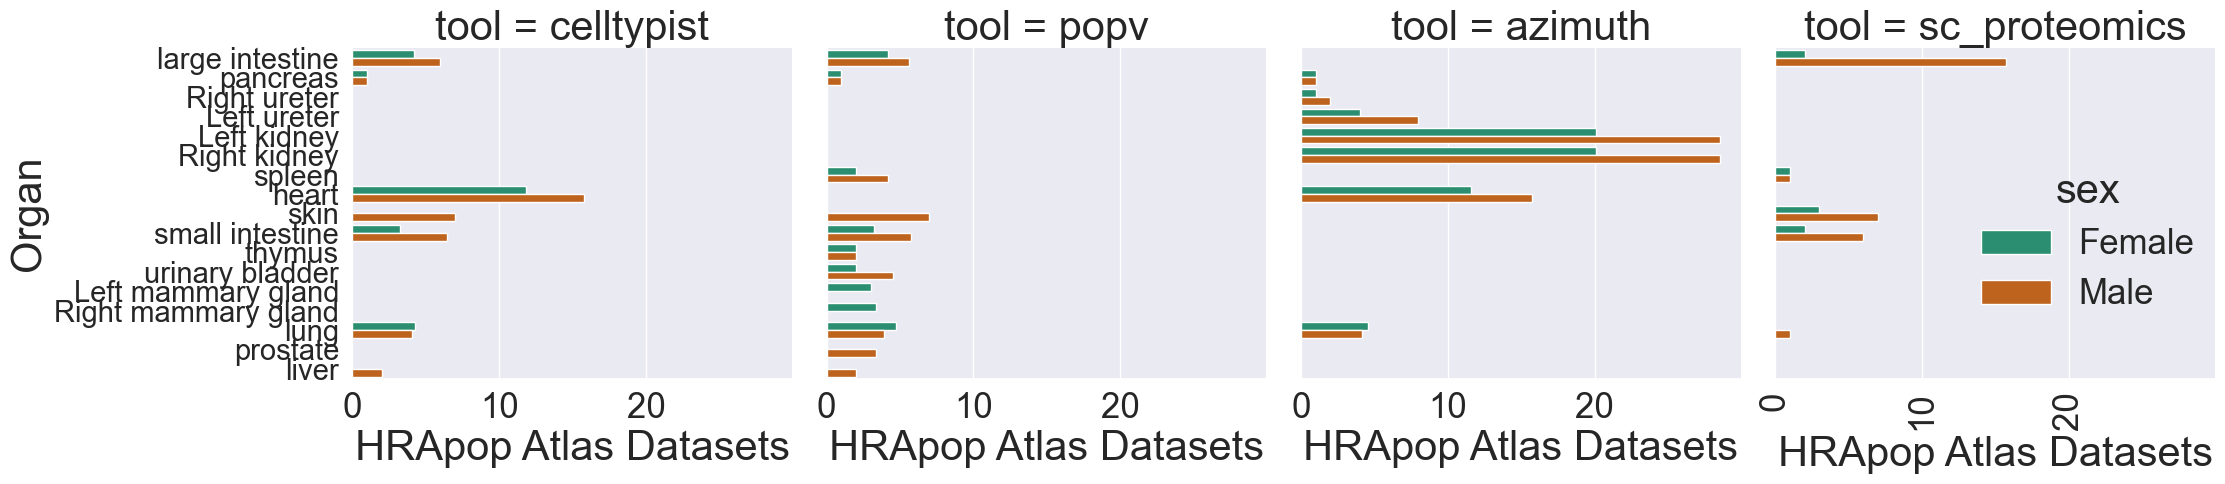

In [193]:
sns.set_palette("Dark2")

# Faceted bar plot
g = sns.catplot(
    data=df,
    x='dataset_count',
    y='organ', 
    hue='sex',
    kind='bar', 
    col='tool',
    errorbar=None
)

g.set_axis_labels("HRApop Atlas Datasets", "Organ")

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.show()

# Preprocess data

In [194]:
df["organ"] = df["organ"].str.lower()
df["as_label"] = df["as_label"].str.lower()
df["organ"] = df["organ"].replace(
    {"right mammary gland": "right breast", "left mammary gland": "left breast"}
)
df["tool"] = df["tool"].replace(
    {"azimuth": "Azimuth", "celltypist": "CellTypist", "popv": "popV"}
)

# Visualize by AS and organ

In [195]:
sns.set_theme(rc={'figure.figsize': (8, 10)})  # width, height in inchdes

# Set global font sizes using rcParams
plt.rcParams.update({
    "axes.titlesize": 30,    
    "axes.labelsize": 30,   
    "xtick.labelsize": 25,   
    "ytick.labelsize": 21,  
    "legend.title_fontsize": 30,
    "legend.fontsize":25
})

In [196]:
# set max numbers of chars in y-axis label
n_max = 20

# create new label in the format {organ}-{AS}
df['as_label_organ'] = df['organ'].str.lower() + ' - ' + df['as_label'].str[:n_max]+'...'
df

,organ,as,as_label,sex,tool,modality,cell_id,cell_label,cell_count,cell_percentage,dataset_count,as_label_organ
0,large intestine,http://purl.obolibrary.org/obo/UBERON_0001052,rectum,Female,CellTypist,sc_transcriptomics,https://purl.org/ccf/ASCTB-TEMP_colonocyte,Colonocyte,1.205,0.147653,3,large intestine - rectum...
1,large intestine,http://purl.obolibrary.org/obo/UBERON_0001052,rectum,Female,CellTypist,sc_transcriptomics,https://purl.org/ccf/ASCTB-TEMP_iga-plasma-cell,IgA plasma cell,1.182,0.144835,3,large intestine - rectum...
2,large intestine,http://purl.obolibrary.org/obo/UBERON_0001052,rectum,Female,CellTypist,sc_transcriptomics,https://purl.org/ccf/ASCTB-TEMP_best4-epithelial,BEST4+ epithelial,0.699,0.085651,3,large intestine - rectum...
3,large intestine,http://purl.obolibrary.org/obo/UBERON_0001052,rectum,Female,CellTypist,sc_transcriptomics,https://purl.org/ccf/ASCTB-TEMP_activated-cd4-t,Activated CD4 T,0.690,0.084548,3,large intestine - rectum...
4,large intestine,http://purl.obolibrary.org/obo/UBERON_0001052,rectum,Female,CellTypist,sc_transcriptomics,https://purl.org/ccf/ASCTB-TEMP_ta,TA,0.540,0.066168,3,large intestine - rectum...
...,...,...,...,...,...,...,...,...,...,...,...,...
8891,lung,http://purl.org/sig/ont/fma/fma7508,left posterior basal segmental bronchus,Male,sc_proteomics,sc_proteomics,http://purl.obolibrary.org/obo/CL_0000097,Mast Cell,15322.464,0.024702,1,lung - left posterior basal...
8892,lung,http://purl.org/sig/ont/fma/fma7508,left posterior basal segmental bronchus,Male,sc_proteomics,sc_proteomics,http://purl.obolibrary.org/obo/CL_4033039,CD8+ T Cell,3691.176,0.005951,1,lung - left posterior basal...
8893,lung,http://purl.org/sig/ont/fma/fma7508,left posterior basal segmental bronchus,Male,sc_proteomics,sc_proteomics,https://purl.org/ccf/ASCTB-TEMP_lymphatic-endo...,Lymphatic Endothelial (and some immune cells),1753.956,0.002828,1,lung - left posterior basal...
8894,lung,http://purl.org/sig/ont/fma/fma7508,left posterior basal segmental bronchus,Male,sc_proteomics,sc_proteomics,https://purl.org/ccf/ASCTB-TEMP_basal-epitheli...,Basal Epithelial Cell,970.104,0.001564,1,lung - left posterior basal...


In [197]:
# filter out sc-proteomics
df = df[df['tool']!= 'sc_proteomics']
df

,organ,as,as_label,sex,tool,modality,cell_id,cell_label,cell_count,cell_percentage,dataset_count,as_label_organ
0,large intestine,http://purl.obolibrary.org/obo/UBERON_0001052,rectum,Female,CellTypist,sc_transcriptomics,https://purl.org/ccf/ASCTB-TEMP_colonocyte,Colonocyte,1.205,1.476535e-01,3,large intestine - rectum...
1,large intestine,http://purl.obolibrary.org/obo/UBERON_0001052,rectum,Female,CellTypist,sc_transcriptomics,https://purl.org/ccf/ASCTB-TEMP_iga-plasma-cell,IgA plasma cell,1.182,1.448352e-01,3,large intestine - rectum...
2,large intestine,http://purl.obolibrary.org/obo/UBERON_0001052,rectum,Female,CellTypist,sc_transcriptomics,https://purl.org/ccf/ASCTB-TEMP_best4-epithelial,BEST4+ epithelial,0.699,8.565127e-02,3,large intestine - rectum...
3,large intestine,http://purl.obolibrary.org/obo/UBERON_0001052,rectum,Female,CellTypist,sc_transcriptomics,https://purl.org/ccf/ASCTB-TEMP_activated-cd4-t,Activated CD4 T,0.690,8.454846e-02,3,large intestine - rectum...
4,large intestine,http://purl.obolibrary.org/obo/UBERON_0001052,rectum,Female,CellTypist,sc_transcriptomics,https://purl.org/ccf/ASCTB-TEMP_ta,TA,0.540,6.616836e-02,3,large intestine - rectum...
...,...,...,...,...,...,...,...,...,...,...,...,...
8879,lung,http://purl.org/sig/ont/fma/fma7508,left posterior basal segmental bronchus,Male,popV,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_0000192,smooth muscle cell,18.000,5.873818e-05,27,lung - left posterior basal...
8880,lung,http://purl.org/sig/ont/fma/fma7508,left posterior basal segmental bronchus,Male,popV,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_0017000,pulmonary ionocyte,9.000,2.936909e-05,27,lung - left posterior basal...
8881,lung,http://purl.org/sig/ont/fma/fma7508,left posterior basal segmental bronchus,Male,popV,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_0000077,mesothelial cell,7.000,2.284263e-05,27,lung - left posterior basal...
8882,lung,http://purl.org/sig/ont/fma/fma7508,left posterior basal segmental bronchus,Male,popV,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_2000008,microvascular endothelial cell,2.000,6.526465e-06,27,lung - left posterior basal...


In [198]:
palette = {
    'Female': '#E00D3A',
    'Male': '#4B4B5E'
}

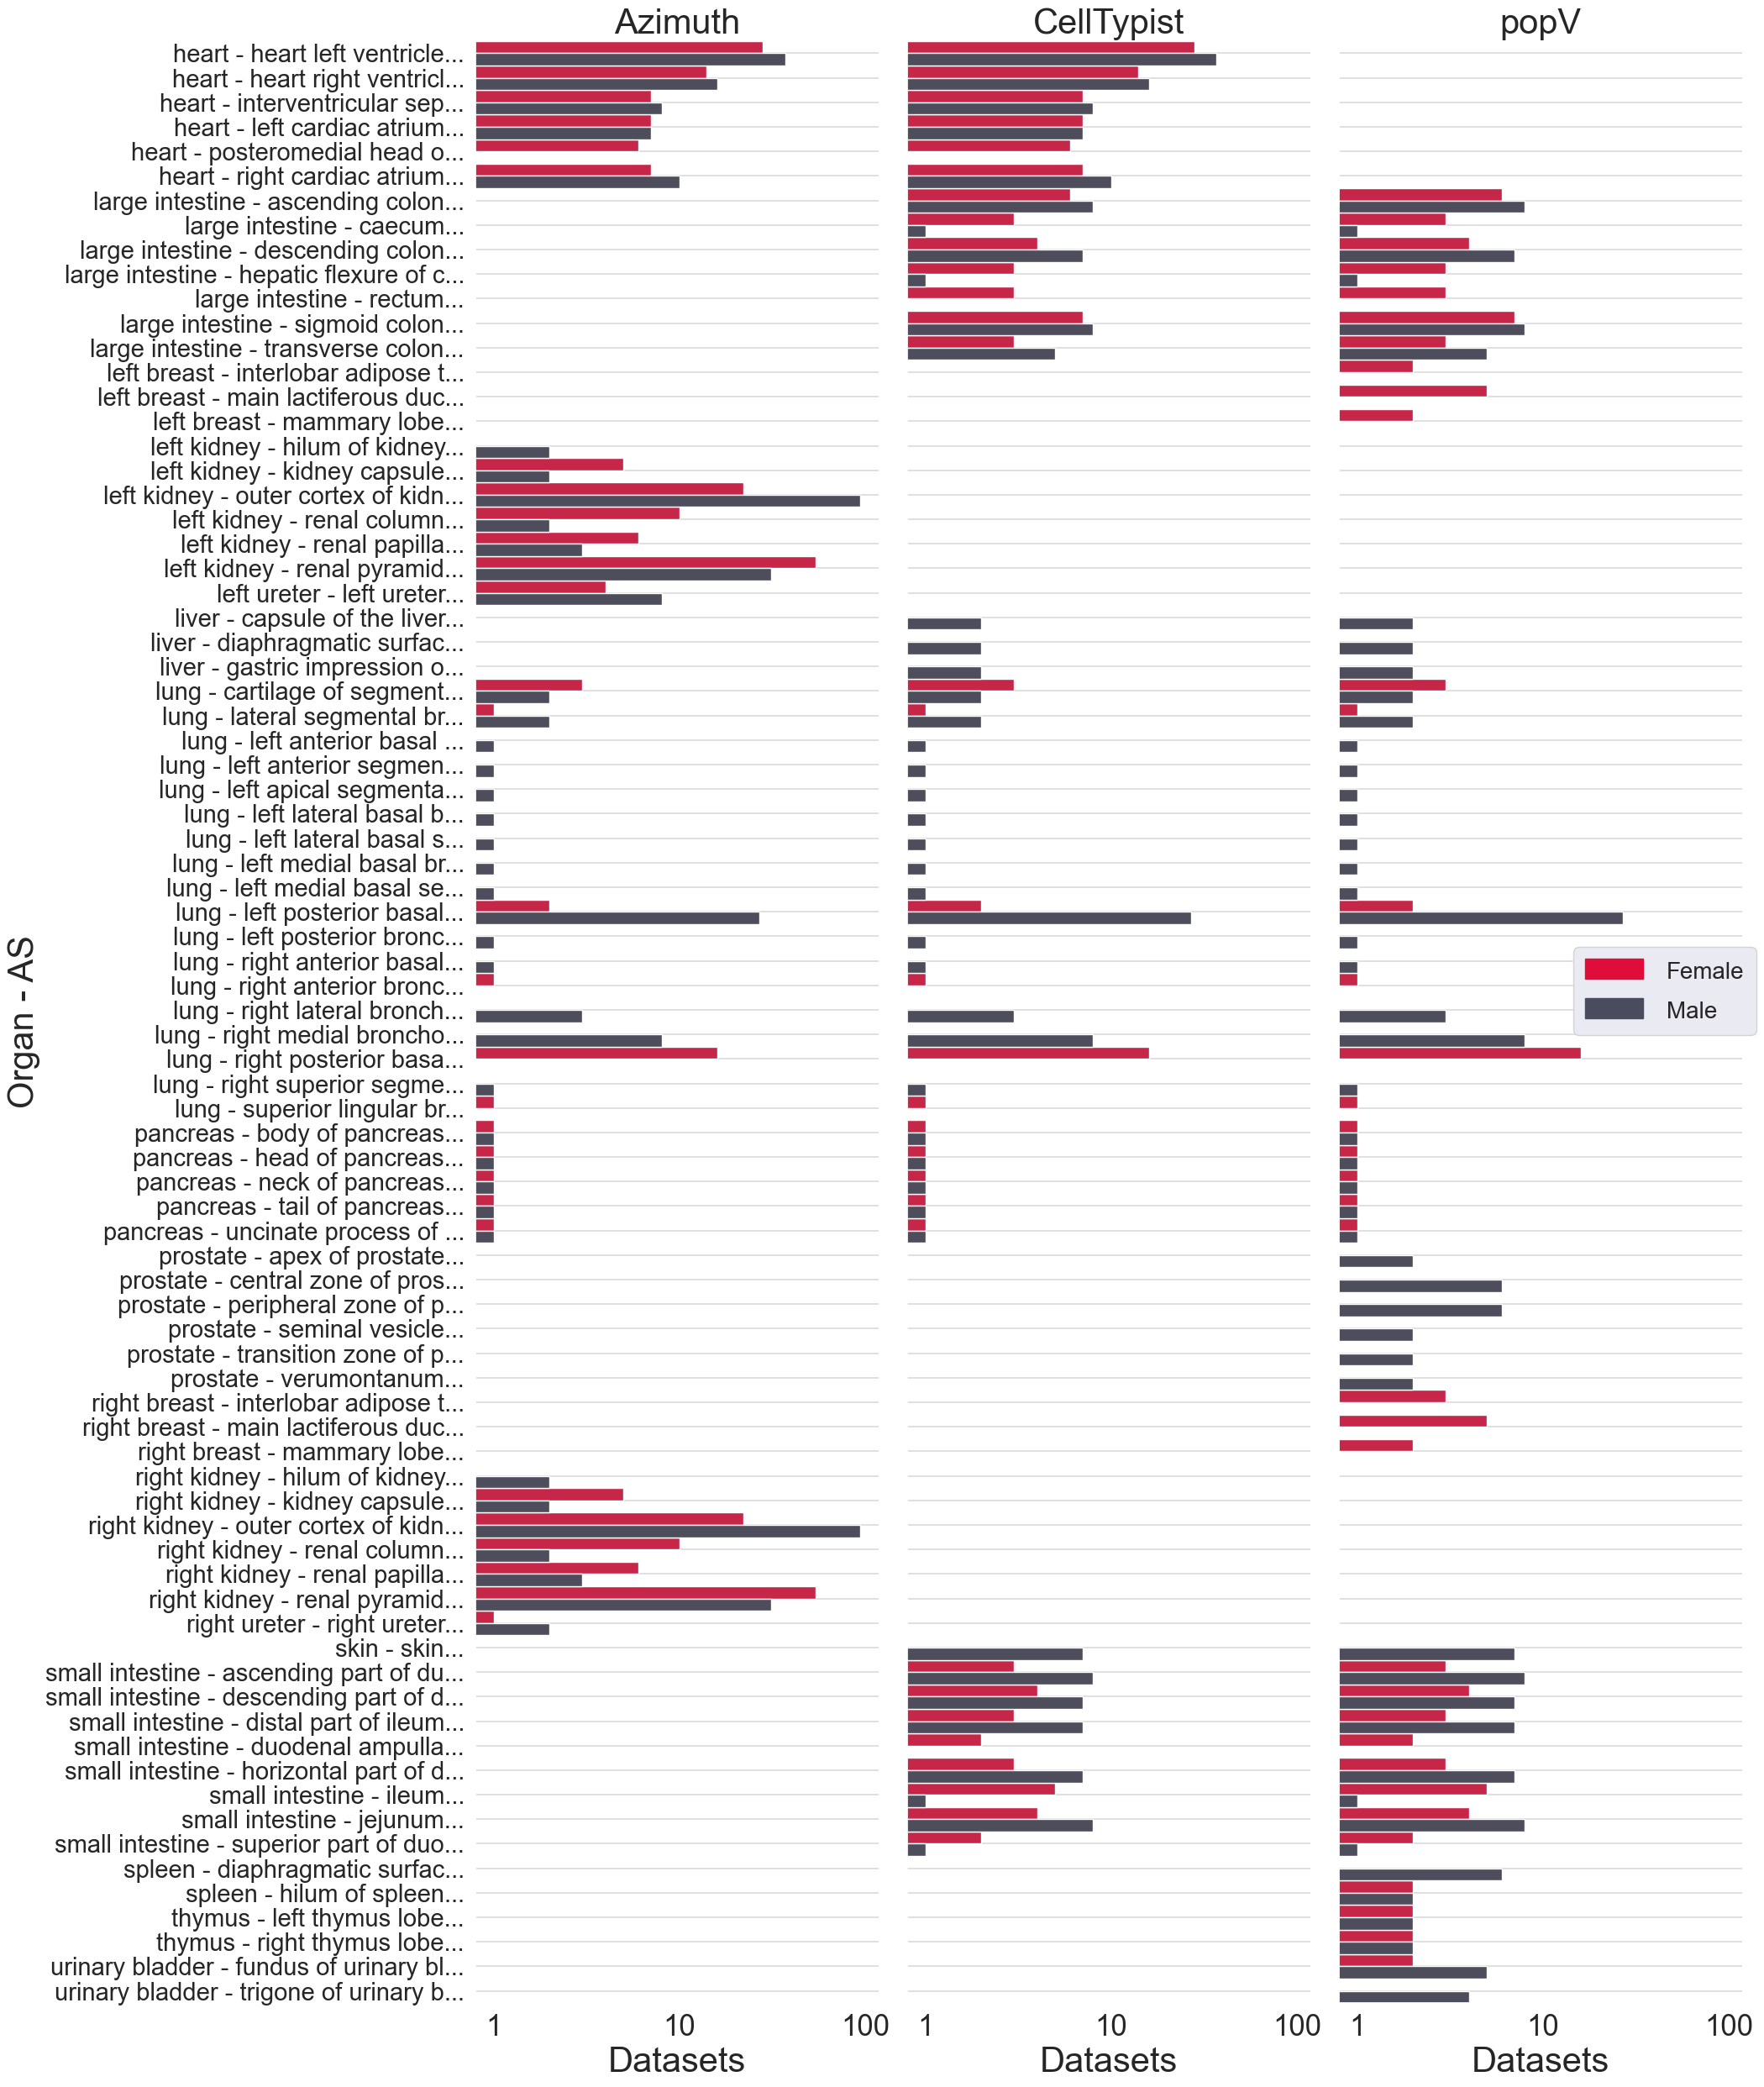

In [199]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

sns.set_palette("Dark2")

# Faceted bar plot
g = sns.catplot(
    data=df,
    x="dataset_count",
    y="as_label_organ",
    kind="bar",
    col="tool",
    hue="sex",
    width=1,
    orient="h",
    height=25,
    aspect=0.25,
    col_order=["Azimuth", "CellTypist", "popV"],
    palette=palette,
    order=sorted(df["as_label_organ"].unique(), reverse=False),  # alphabetical organ+AS
)

g.figure.subplots_adjust(hspace=1)

# apply log transform to x-acis
plt.xscale("log")

# Remove row labels
g.row_names = [""] * len(g.row_names)

# Axis labels
g.set_axis_labels("Datasets", "Organ - AS")

# Format each facet
for ax in g.axes.flat:

    # get column name for facet title
    col_idx = ax.get_subplotspec().colspan.start
    col_val = g.col_names[col_idx]

    # ax.set_title(f"{col_val}")

    # white backgrounds
    g.figure.set_facecolor("white")
    ax.set_facecolor("white")

    # thin grey grid lines
    ax.grid(True, which="major", axis="y", linestyle="-", linewidth=0.35, color="grey")


# ==========================
#  CUSTOM LEGEND
# ==========================

# remove seaborn's automatic legend
g._legend.remove()

# Build patches from hue categories (sex)
unique_labels = df["sex"].unique()
legend_colors = [palette[label] for label in unique_labels]

patches = [
    mpatches.Patch(color=legend_colors[i], label=unique_labels[i])
    for i in range(len(unique_labels))
]

# Add legend to the right side
legend = g.fig.legend(
    handles=patches,
    loc="center right",
    bbox_to_anchor=(1, 0.525),
    frameon=True,
    framealpha=1,
)

# format x-axis tick labels
ax = plt.gca()
ax.xaxis.set_major_formatter(ScalarFormatter())
ax.ticklabel_format(style="plain", axis="x")


# Style legend box
legend.get_frame().set_edgecolor("lightgrey")
legend.get_frame().set_linewidth(1)

# Legend text appearance
for text in legend.texts:
    text.set_fontsize(20)  # adjust if needed

# g.ticklabel_format(style="plain", axis="x")


# facet title font size
g.set_titles("{col_name}", fontsize=25)

# Prevent label cutoff
plt.tight_layout()

plt.show()

In [201]:
# export
g.figure.savefig(f'output/Fig. 6.pdf', dpi=600, bbox_inches='tight')